## Comparing the clean and incremental build time of a system on its different configurations

In [7]:
import pandas as pd
import numpy as np

# Will show the clean build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/rez_sample_03I/'
#path = '/src/data/'
df1 = pd.read_csv(path + 'clean-bt.csv', converters={'BranchC': lambda x: str(x)})
df2 = pd.read_csv(path + 'incremental-bt.csv', converters={'Br2': lambda x: str(x)})

df1 = df1.rename(columns = {"BranchC": "Branch", "Build Time": "Clean Build Time"})
df2 = df2.rename(columns = {"Br2": "Branch", 
                            "max": "Max Inc. Build Time", 
                            "mean": "Mean Inc. Build Time",
                            "min": "Min Inc. Build Time"})
df3 = pd.merge(df1, df2) 
df3.round(decimals=2)


,Branch,Clean Build Time,Binary Size,Max Inc. Build Time,Mean Inc. Build Time,Min Inc. Build Time
0,00001,37.48,1913968,37.60,37.42,37.33
1,00002,38.12,1938720,40.22,38.00,37.67
2,00003,34.34,2278824,36.05,34.02,33.80
3,00004,69.61,3047312,69.53,69.21,69.01
4,00005,37.49,2442528,39.12,37.45,37.26
5,00006,64.95,2845544,67.07,65.25,64.95
6,00007,21.02,1601416,21.09,20.97,20.85
7,00008,20.57,1657760,20.53,20.34,20.24
8,00009,65.47,2836352,65.72,65.37,65.13
9,00010,31.79,1749400,33.46,31.86,31.66


In [8]:
df2['Time Diff. %'] = (1 - (df2['Min Inc. Build Time'] / df1['Clean Build Time'])) * 100
df4 = pd.merge(df1[["Branch", "Clean Build Time"]], 
                df2[["Branch", "Min Inc. Build Time", "Time Diff. %"]]) 
df4 = df4.round(decimals=2).sort_values(by = "Time Diff. %", ascending=False)

df4 = df4.sort_index()
df4 

,Branch,Clean Build Time,Min Inc. Build Time,Time Diff. %
0,00001,37.48,37.33,0.41
1,00002,38.12,37.67,1.16
2,00003,34.34,33.80,1.59
3,00004,69.61,69.01,0.86
4,00005,37.49,37.26,0.60
5,00006,64.95,64.95,0.00
6,00007,21.02,20.85,0.83
7,00008,20.57,20.24,1.62
8,00009,65.47,65.13,0.52
9,00010,31.79,31.66,0.43


In [9]:
# Extracting only the first and last 5 extreme differences in build time
#df5 = df4[: 5]
#df6 = df4[-5:]
#df7 = df5.append(df6)
#df7

df5 = df4.set_index(["Branch"])
df5

,Clean Build Time,Min Inc. Build Time,Time Diff. %
Branch,,,
00001,37.48,37.33,0.41
00002,38.12,37.67,1.16
00003,34.34,33.80,1.59
00004,69.61,69.01,0.86
00005,37.49,37.26,0.60
00006,64.95,64.95,0.00
00007,21.02,20.85,0.83
00008,20.57,20.24,1.62
00009,65.47,65.13,0.52


<AxesSubplot:xlabel='Configurations', ylabel='Difference of build time'>

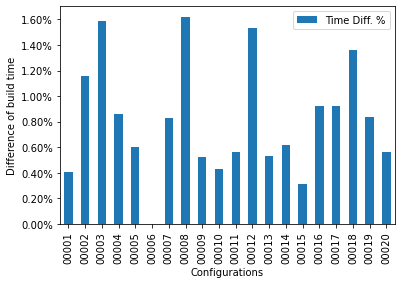

In [10]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


ib_plot = df5[["Time Diff. %"]].plot(kind='bar')


ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("Difference of build time")

ib_plot.yaxis.set_major_formatter(mtick.PercentFormatter())
ib_plot.xaxis.tick_bottom()

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig03.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

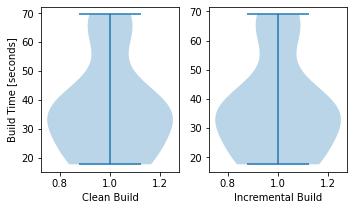

In [11]:
# The clean and incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = df5['Clean Build Time']
labels1 = 'Clean Build'
all_data2 = df5['Min Inc. Build Time']
labels2 = 'Incremental Build'

     
plt.rc('font', size=10)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("Build Time [seconds]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)


fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig04.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

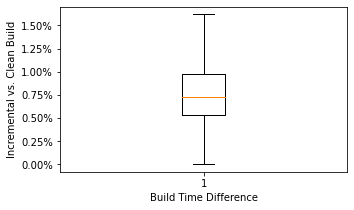

In [12]:
# The clean and incremental build time summaried for all configurations in %
import matplotlib.pyplot as plt
 
all_data1 = df5['Time Diff. %']
labels1 = "Build Time Difference"
     
plt.rc('font', size=10)

fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(5, 3))

#ax1.violinplot(all_data1)
ax1.boxplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("Incremental vs. Clean Build")

ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig05.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()